## Excel to CSV

In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('/content/drive/MyDrive/vmware/vm1.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (32,40,41,43,52) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## Data Review

In [7]:
for i,j in enumerate(df.columns):
    print(i,j)

0 day
1 agg_lineitem_unblendedcost
2 agg_lineitem_usageamount
3 agg_lineitem_blendedcost
4 agg_pricing_publicondemandcost
5 agg_reservation_effectivecost
6 agg_reservation_amortizedupfrontfeeforbillingperiod
7 agg_reservation_amortizedupfrontcostforusage
8 agg_reservation_unusedamortizedupfrontfeeforbillingperiod
9 agg_reservation_unusednormalizedunitquantity
10 agg_reservation_recurringfeeforusage
11 agg_reservation_totalreservednormalizedunits
12 agg_reservation_unusedquantity
13 agg_reservation_unusedrecurringfee
14 agg_savingsplan_unusedamortizedupfrontcommitmentforbillingperiod
15 agg_savingsplan_totalcommitmenttodate
16 agg_savingsplan_savingsplaneffectivecost
17 agg_savingsplan_recurringcommitmentforbillingperiod
18 agg_savingsplan_amortizedcostforusage
19 agg_savingsplan_amortizedupfrontcommitmentforbillingperiod
20 bill_billingentity
21 bill_payeraccountid
22 lineitem_lineitemdescription
23 lineitem_lineitemtype
24 lineitem_operation
25 lineitem_usageaccountid
26 pricing_term


In [8]:
df.isna().sum()

day                                                                     0
agg_lineitem_unblendedcost                                              0
agg_lineitem_usageamount                                                2
agg_lineitem_blendedcost                                                2
agg_pricing_publicondemandcost                                          2
agg_reservation_effectivecost                                       99032
agg_reservation_amortizedupfrontfeeforbillingperiod                 99877
agg_reservation_amortizedupfrontcostforusage                        99032
agg_reservation_unusedamortizedupfrontfeeforbillingperiod           99877
agg_reservation_unusednormalizedunitquantity                        99880
agg_reservation_recurringfeeforusage                                99032
agg_reservation_totalreservednormalizedunits                        99880
agg_reservation_unusedquantity                                      99877
agg_reservation_unusedrecurringfee    

In [4]:
df.iloc[540:545,39:43]

,product_tolocation,reservation_endtime,reservation_starttime,reservation_reservationarn
540,NaN,NaN,NaN,NaN
541,NaN,NaN,NaN,NaN
542,NaN,NaN,NaN,arn:aws:ec2:us-west-2:116462199383:reserved-in...
543,NaN,2023-12-21T16:06:53.000Z,2021-05-01T22:00:00.000Z,arn:aws:ec2:us-west-2:301213811993:reserved-in...
544,NaN,NaN,NaN,NaN


## Assumptions

Does the usage amount depend on:
1. number of services used by an account 
2. duration for which the services were used 
3. subscription type 
4. service type 

## Data Exploration

Assumption
- Some colums are aggregate if the line items
- They are aggregated on keys 

In [9]:
sub_df1 = df[['lineitem_usageaccountid','product_productname']]
sub_df_prod = sub_df1.groupby('lineitem_usageaccountid').count().transform(lambda x : x) 
sub_df_prod

,product_productname
lineitem_usageaccountid,
111827316158,28
112665216564,15
112727719117,30
112939234846,27
113473952327,27
...,...
9982593122168,12
9983354255712,35
9985514679412,15


In [12]:
sub_df_prod['product_productname'].value_counts()

26     185
28     176
24     174
29     162
25     158
      ... 
96       1
59       1
79       1
112      1
135      1
Name: product_productname, Length: 91, dtype: int64

In [ ]:
sub_df1.groupby('lineitem_usageaccountid').where(sub_df1['product_productname']==26)

In [6]:
sub_df1.groupby('lineitem_usageaccountid').count().mode() 
# most accounts use 26 AWS services

,product_productname
0,26


In [11]:
df.groupby('product_productname').count()

,day,agg_lineitem_unblendedcost,agg_lineitem_usageamount,agg_lineitem_blendedcost,agg_pricing_publicondemandcost,agg_reservation_effectivecost,agg_reservation_amortizedupfrontfeeforbillingperiod,agg_reservation_amortizedupfrontcostforusage,agg_reservation_unusedamortizedupfrontfeeforbillingperiod,agg_reservation_unusednormalizedunitquantity,...,reservation_modificationstatus,reservation_subscriptionid,savingsplan_endtime,savingsplan_starttime,savingsplan_savingsplanarn,savingsplan_region,savingsplan_purchaseterm,savingsplan_purchaseoption,savingsplan_paymentoption,savingsplan_instancetypefamily
product_productname,,,,,,,,,,,,,,,,,,,,,
AWS Certificate Manager,3,3,3,3,3,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
AWS CloudHSM,2,2,2,2,2,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
AWS CloudTrail,6168,6168,6168,6168,6168,0,0,0,0,0,...,0,6006,0,0,0,0,0,5906,0,0
AWS CodeArtifact,1,1,1,1,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
AWS CodeCommit,1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
OpenVPN Access Server (10 Connected Devices),1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
OpenVPN Access Server (25 Connected Devices),1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Savings Plans for AWS Compute usage,4,4,4,4,4,0,0,0,0,0,...,0,0,4,4,4,4,4,4,4,2


In [12]:
df['product_productname'].mode()

0    Amazon Simple Storage Service
dtype: object

In [7]:
sub_df2 = df[['lineitem_usageaccountid','agg_lineitem_usageamount','agg_lineitem_blendedcost']]
sub_df_usage = sub_df2.groupby(['lineitem_usageaccountid']).sum().transform(lambda x : x) 
sub_df_usage

,agg_lineitem_usageamount,agg_lineitem_blendedcost
lineitem_usageaccountid,,
111827316158,2353.629426,0.007585
112665216564,2286.000000,0.000050
112727719117,7185.970123,0.188043
112939234846,38.618552,-0.000973
113473952327,20676.303767,0.101646
...,...,...
9982593122168,3961.000002,0.000038
9983354255712,14074.000027,0.008380
9985514679412,20371.001284,0.000349


In [8]:
max(sub_df_prod['product_productname']) # 423
min(sub_df_prod['product_productname'])

1

In [ ]:
max(sub_df_usage['agg_lineitem_usageamount'])
min(sub_df_usage['agg_lineitem_usageamount'])

1.21e-08

In [9]:
account_product_amount = pd.concat([sub_df_prod,sub_df_usage[['agg_lineitem_usageamount','agg_lineitem_blendedcost']]],axis=1)
account_product_amount 

,product_productname,agg_lineitem_usageamount,agg_lineitem_blendedcost
lineitem_usageaccountid,,,
111827316158,28,2353.629426,0.007585
112665216564,15,2286.000000,0.000050
112727719117,30,7185.970123,0.188043
112939234846,27,38.618552,-0.000973
113473952327,27,20676.303767,0.101646
...,...,...,...
9982593122168,12,3961.000002,0.000038
9983354255712,35,14074.000027,0.008380
9985514679412,15,20371.001284,0.000349


In [10]:
account_product_amount['product_productname'].corr(account_product_amount['agg_lineitem_usageamount'])

0.09767389139483963

In [11]:
account_product_amount['product_productname'].corr(account_product_amount['agg_lineitem_blendedcost']) 

0.4361461400085151

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdc85e33790>]],
      dtype=object)

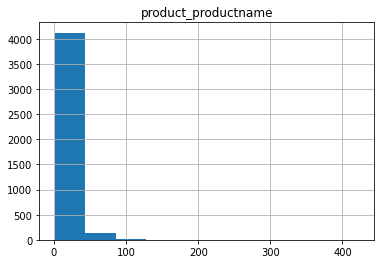

In [12]:
sub_df1.groupby(['lineitem_usageaccountid']).count().hist() 
# most of the accounts use around 26 services
# a very few accounts use more that 100 services

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdc8560dc10>,
      dtype=object)

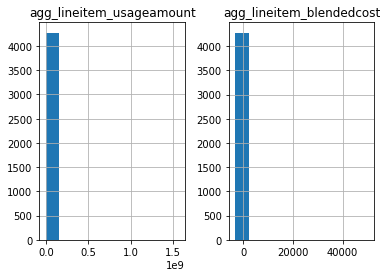

In [15]:
sub_df2.groupby(['lineitem_usageaccountid']).sum().hist()

### Observation after data exploration

- Some columns are aggregate of some keys 

Regarding products 
- In this dataset there are **82 unique services** provided by AWS
- Most commonly used service is **Amazon Simple Storage Service**
- Most accounts use **26 services**
- correlation between number of products and blended cost : **0.4361**
- correlation between number of products and usageamount : **0.09767**
- Time given are in string 

## Data preprocessing 

In [16]:
reservation_end_time = pd.to_datetime(df['reservation_endtime'],  format="%Y-%m-%dT%H:%M:%S.%f")
reservation_start_time = pd.to_datetime(df['reservation_starttime'],  format="%Y-%m-%dT%H:%M:%S.%f")
df['reservation_duration'] = reservation_end_time - reservation_start_time

In [17]:
test_df = df[['reservation_duration','agg_lineitem_blendedcost','agg_lineitem_usageamount']]
test_df.dropna() 

,reservation_duration,agg_lineitem_blendedcost,agg_lineitem_usageamount
543,963 days 18:06:53,153.6360,3720.0
1025,1094 days 23:59:59,50.8896,744.0
1305,1094 days 23:59:59,394.3200,3720.0
1307,1094 days 23:59:59,50.8896,744.0
1334,1094 days 23:59:59,55.0560,744.0
...,...,...,...
51961,299 days 19:29:53,218.7360,4464.0
52917,733 days 05:03:27,55.0560,744.0
53193,1094 days 23:59:59,50.8896,744.0
54026,1001 days 04:08:07,131.2416,35712.0


In [18]:
test_df = test_df.dropna()
minutes = test_df['reservation_duration'].dt.components['days']*24*60 + \
test_df['reservation_duration'].dt.components['minutes']
test_df['reservation_in_minutes'] = minutes
test_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,reservation_duration,agg_lineitem_blendedcost,agg_lineitem_usageamount,reservation_in_minutes
543,963 days 18:06:53,153.6360,3720.0,1386726
1025,1094 days 23:59:59,50.8896,744.0,1575419
1305,1094 days 23:59:59,394.3200,3720.0,1575419
1307,1094 days 23:59:59,50.8896,744.0,1575419
1334,1094 days 23:59:59,55.0560,744.0,1575419
...,...,...,...,...
51961,299 days 19:29:53,218.7360,4464.0,430589
52917,733 days 05:03:27,55.0560,744.0,1055523
53193,1094 days 23:59:59,50.8896,744.0,1575419
54026,1001 days 04:08:07,131.2416,35712.0,1441448


In [19]:
max(test_df['reservation_in_minutes']) # 1575419
min(test_df['reservation_in_minutes']) #

33120

In [20]:
test_df['reservation_in_minutes'].corr(test_df['agg_lineitem_usageamount'])  

-0.19801161259880226

In [21]:
test_df['reservation_in_minutes'].corr(test_df['agg_lineitem_blendedcost'])

0.036500715663066244

### Observations after data preprocessing

- given time are in string
- convert them to date time timestamp 
- find the duration for which the services were reserved

After preprocess
- correlation between reservation time and blended cost: **0.0365**
- correlation between reservation time and usgeamount: **-0.198**
- reservation does not guarantee usage
- resevation might not be a sufficient paramater to decide the spike or usage amount
- Eg: \
row: 47509\
duration: 23 days 10:00:00, 33120\
cost: 77.08799999999998

- row: 50644\
duration: 1094 days 23:59:59, 1575419 min\
cost: 0.0

## Next steps 

- After the data exploration and data preprocessing, found that there is a pattern in the data 
- The pattern can help us classify the events 
    - events that will require to be alerted  
- Data is **not labeled** 
- Use unsupervised learning to determine the pattern in the data
- KMean clustering to see the pattern 
    - challenge in KMeans: setting parameter k 
    - silhouette score to determine k

## KMeans

Data prepration:
1. label encode the categorical columns
2. drop columns with more than 50% of missing values 
3. replace missing values with some other values
4. normalise the data since the KMeans works on numeric values and normalised data
5. calcualte the silhouette score of the dataset to know the ideal value for k
6. implement KMeans with K=k
7. visualize the the clusters

In [22]:
from sklearn.cluster import KMeans
%matplotlib inline

In [23]:
kmeans_df = df.iloc[:,0:54]

In [24]:
df.iloc[:,0:54].head()

,day,agg_lineitem_unblendedcost,agg_lineitem_usageamount,agg_lineitem_blendedcost,agg_pricing_publicondemandcost,agg_reservation_effectivecost,agg_reservation_amortizedupfrontfeeforbillingperiod,agg_reservation_amortizedupfrontcostforusage,agg_reservation_unusedamortizedupfrontfeeforbillingperiod,agg_reservation_unusednormalizedunitquantity,...,reservation_subscriptionid,savingsplan_endtime,savingsplan_starttime,savingsplan_savingsplanarn,savingsplan_region,savingsplan_purchaseterm,savingsplan_purchaseoption,savingsplan_paymentoption,savingsplan_instancetypefamily,reservation_duration
0,2022-01-01,0.000000,1.000000e+00,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1,2022-01-01,0.000000,1.000000e+00,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,2022-01-01,0.000006,2.000000e+00,0.000006,0.000006,NaN,NaN,NaN,NaN,NaN,...,6.905967e+08,NaN,NaN,NaN,NaN,NaN,OnDemand,NaN,NaN,NaT
3,2022-01-01,0.000000,2.042000e-07,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,...,4.888016e+08,NaN,NaN,NaN,NaN,NaN,OnDemand,NaN,NaN,NaT
4,2022-01-01,-0.150000,0.000000e+00,-0.150000,0.000000,NaN,NaN,NaN,NaN,NaN,...,3.038016e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


label encode the categorical values

In [25]:
categorical_columns, quantitative_columns = [], []
for col in kmeans_df.columns:
  if kmeans_df[col].dtypes==object:
    categorical_columns.append(col)
  else:
    quantitative_columns.append(col)

In [26]:
for column in categorical_columns:
  unique_values = kmeans_df[column].unique()
  dictionary = dict()
  for i,val in enumerate(unique_values):
    dictionary[val]=i 
  kmeans_df[column] = kmeans_df[column].map(dictionary)

In [ ]:
kmeans_df.isna().sum()

day                                                                     0
agg_lineitem_unblendedcost                                              0
agg_lineitem_usageamount                                                2
agg_lineitem_blendedcost                                                2
agg_pricing_publicondemandcost                                          2
agg_reservation_effectivecost                                       99032
agg_reservation_amortizedupfrontfeeforbillingperiod                 99877
agg_reservation_amortizedupfrontcostforusage                        99032
agg_reservation_unusedamortizedupfrontfeeforbillingperiod           99877
agg_reservation_unusednormalizedunitquantity                        99880
agg_reservation_recurringfeeforusage                                99032
agg_reservation_totalreservednormalizedunits                        99880
agg_reservation_unusedquantity                                      99877
agg_reservation_unusedrecurringfee    

drop the columns with missing values

In [ ]:
columns_with_null_values = []
for column in kmeans_df.columns:
    if kmeans_df[column].isnull().sum() > 2:
        columns_with_null_values.append(column) 

replace missing values with 0

In [ ]:
kmeans_df = kmeans_df.drop(columns_with_null_values,axis=1)
kmeans_df = kmeans_df.fillna(0)

In [ ]:
kmeans_df.isnull().sum()

day                               0
agg_lineitem_unblendedcost        0
agg_lineitem_usageamount          0
agg_lineitem_blendedcost          0
agg_pricing_publicondemandcost    0
bill_billingentity                0
bill_payeraccountid               0
lineitem_lineitemdescription      0
lineitem_lineitemtype             0
lineitem_operation                0
lineitem_usageaccountid           0
pricing_term                      0
lineitem_usagetype                0
pricing_unit                      0
pricing_purchaseoption            0
pricing_offeringclass             0
product_fromlocation              0
product_category                  0
product_instancetype              0
product_instancefamily            0
product_operatingsystem           0
product_productfamily             0
product_productname               0
product_region                    0
product_tolocation                0
reservation_endtime               0
reservation_starttime             0
reservation_reservationarn  

In [ ]:
kmeans_df.describe()

,day,agg_lineitem_unblendedcost,agg_lineitem_usageamount,agg_lineitem_blendedcost,agg_pricing_publicondemandcost,bill_billingentity,bill_payeraccountid,lineitem_lineitemdescription,lineitem_lineitemtype,lineitem_operation,...,reservation_reservationarn,reservation_modificationstatus,savingsplan_endtime,savingsplan_starttime,savingsplan_savingsplanarn,savingsplan_region,savingsplan_purchaseterm,savingsplan_purchaseoption,savingsplan_paymentoption,savingsplan_instancetypefamily
count,100000.000000,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000
mean,0.454150,5.257119e-01,2.580679e+04,5.063580e-01,3.247573e-01,0.000050,1.164622e+11,562.484140,1.183740,17.105140,...,3.666500,0.001810,0.328130,0.328130,0.328130,0.076270,0.07599,1.098780,0.150420,0.000170
std,0.497896,4.594839e+01,5.018916e+06,4.342490e+01,2.611805e+01,0.007071,2.265942e-01,1216.796509,0.860957,23.335967,...,41.462943,0.054468,1.435939,1.435939,1.435939,0.268391,0.26521,0.721892,0.526096,0.017606
min,0.000000,-3.326660e+03,0.000000e+00,-3.326660e+03,0.000000e+00,0.000000,1.164622e+11,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,2.719200e-06,0.000000e+00,0.000000e+00,0.000000,1.164622e+11,49.000000,1.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000
50%,0.000000,1.394500e-07,1.000000e+00,2.940000e-07,4.000000e-07,0.000000,1.164622e+11,151.000000,1.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000
75%,1.000000,6.000000e-06,4.000000e+00,6.000000e-06,6.000000e-06,0.000000,1.164622e+11,463.000000,1.000000,23.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000
max,1.000000,6.901046e+03,1.531476e+09,5.257698e+03,6.901046e+03,1.000000,1.164622e+11,7549.000000,9.000000,324.000000,...,751.000000,2.000000,41.000000,41.000000,41.000000,6.000000,2.00000,9.000000,2.000000,3.000000



Min-max normalization: 
- all features will have the exact same scale 
- does not handle outliers well. 

Z-score normalization: 
- Handles outliers
- does not produce normalized data with the exact same scale.

**Using Z-score normalization since the dataset have outliers**


In [ ]:
normalized_df=(kmeans_df-kmeans_df.mean())/kmeans_df.std()
normalized_df.describe()

,day,agg_lineitem_unblendedcost,agg_lineitem_usageamount,agg_lineitem_blendedcost,agg_pricing_publicondemandcost,bill_billingentity,bill_payeraccountid,lineitem_lineitemdescription,lineitem_lineitemtype,lineitem_operation,...,reservation_reservationarn,reservation_modificationstatus,savingsplan_endtime,savingsplan_starttime,savingsplan_savingsplanarn,savingsplan_region,savingsplan_purchaseterm,savingsplan_purchaseoption,savingsplan_paymentoption,savingsplan_instancetypefamily
count,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,...,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05
mean,-3.535179e-13,-8.151332e-16,1.780049e-16,-9.700184e-16,-1.015420e-15,1.506464e-16,-9.999277e-01,1.178652e-14,3.869129e-14,-1.243686e-14,...,-1.331960e-14,1.690880e-14,-6.906953e-16,-6.906953e-16,-6.906953e-16,9.157834e-15,-7.739245e-15,-6.866744e-14,1.368597e-14,1.356655e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,7.601735e-13,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-9.121386e-01,-7.241137e+01,-5.141905e-03,-7.661886e+01,-1.243421e-02,-7.071209e-03,-9.999277e-01,-4.622664e-01,-1.374912e+00,-7.329947e-01,...,-8.842836e-02,-3.323057e-02,-2.285125e-01,-2.285125e-01,-2.285125e-01,-2.841752e-01,-2.865279e-01,-1.522084e+00,-2.859176e-01,-9.655753e-03
25%,-9.121386e-01,-1.144136e-02,-5.141905e-03,-1.166055e-02,-1.243421e-02,-7.071209e-03,-9.999277e-01,-4.219967e-01,-2.134137e-01,-5.615855e-01,...,-8.842836e-02,-3.323057e-02,-2.285125e-01,-2.285125e-01,-2.285125e-01,-2.841752e-01,-2.865279e-01,-1.368349e-01,-2.859176e-01,-9.655753e-03
50%,-9.121386e-01,-1.144135e-02,-5.141706e-03,-1.166054e-02,-1.243419e-02,-7.071209e-03,-9.999277e-01,-3.381701e-01,-2.134137e-01,-3.044716e-01,...,-8.842836e-02,-3.323057e-02,-2.285125e-01,-2.285125e-01,-2.285125e-01,-2.841752e-01,-2.865279e-01,-1.368349e-01,-2.859176e-01,-9.655753e-03
75%,1.096314e+00,-1.144123e-02,-5.141108e-03,-1.166041e-02,-1.243398e-02,-7.071209e-03,-9.999277e-01,-8.175906e-02,-2.134137e-01,2.526083e-01,...,-8.842836e-02,-3.323057e-02,-2.285125e-01,-2.285125e-01,-2.285125e-01,-2.841752e-01,-2.865279e-01,-1.368349e-01,-2.859176e-01,-9.655753e-03
max,1.096314e+00,1.501798e+02,3.051357e+02,1.210640e+02,2.642127e+02,1.414171e+02,-9.999277e-01,5.741729e+00,9.078571e+00,1.315115e+01,...,1.802413e+01,3.668564e+01,2.832423e+01,2.832423e+01,2.832423e+01,2.207129e+01,7.254672e+00,1.094516e+01,3.515673e+00,1.703860e+02


Silhouette score

Why Silhouette score

- Elbow method only calculates the euclidean distance whereas silhouette takes into account variables such as variance, skewness, high-low differences, etc

In [ ]:
from sklearn.metrics import silhouette_score

sil = []
kmax = 10

for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(normalized_df)
  labels = kmeans.labels_
  sil.append(silhouette_score(normalized_df, labels, metric = 'euclidean'))


In [ ]:
sil_copy = sil.copy()

In [ ]:
lab=np.arange(9,dtype=int)
lab = pd.DataFrame(lab, columns = ['k'])
sil = pd.DataFrame(sil, columns = ['centroids'])

In [ ]:
sil_df=pd.concat([lab, sil], axis=1)
sil_df

,k,centroids
0,0,0.630617
1,1,0.600023
2,2,0.601098
3,3,0.186889
4,4,0.205338
5,5,0.235014
6,6,0.245544
7,7,0.245953
8,8,0.236864


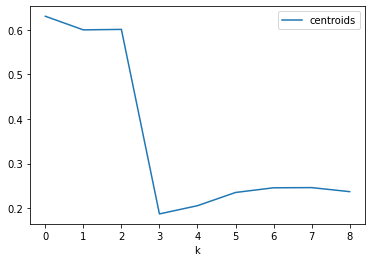

In [ ]:
sil_df.plot(x='k', y='centroids') # silhouette_score = 2

kmeans

In [ ]:
from sklearn.cluster import KMeans
from re import U
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters= 2)
label = kmeans.fit_predict(normalized_df) 

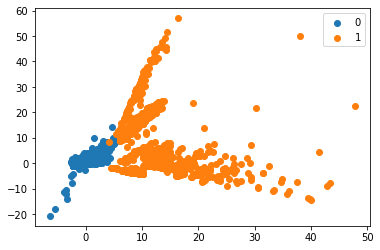

In [ ]:
pca = PCA(2)
dff = pca.fit_transform(normalized_df)
u_labels = np.unique(label)
centroids = kmeans.cluster_centers_

for i in u_labels:
    plt.scatter(dff[label == i , 0] , dff[label == i , 1] , label = i)
# plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, marker="x", color='r')
plt.legend()
plt.show()

### Observation after KMeans 

- KMeans got two clusters 
- made me to make reasonable assumption that there are two different kind of events 
- binary classification 

In [ ]:
label_df = pd.DataFrame(label,columns=['labels'])
labeled_df = pd.concat([df.iloc[:,0:54], label_df],axis=1)
labeled_df.head()

,day,agg_lineitem_unblendedcost,agg_lineitem_usageamount,agg_lineitem_blendedcost,agg_pricing_publicondemandcost,agg_reservation_effectivecost,agg_reservation_amortizedupfrontfeeforbillingperiod,agg_reservation_amortizedupfrontcostforusage,agg_reservation_unusedamortizedupfrontfeeforbillingperiod,agg_reservation_unusednormalizedunitquantity,...,savingsplan_endtime,savingsplan_starttime,savingsplan_savingsplanarn,savingsplan_region,savingsplan_purchaseterm,savingsplan_purchaseoption,savingsplan_paymentoption,savingsplan_instancetypefamily,reservation_duration,labels
0,2022-01-01,0.000000,1.000000e+00,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,0
1,2022-01-01,0.000000,1.000000e+00,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,0
2,2022-01-01,0.000006,2.000000e+00,0.000006,0.000006,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,OnDemand,NaN,NaN,NaT,0
3,2022-01-01,0.000000,2.042000e-07,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,OnDemand,NaN,NaN,NaT,0
4,2022-01-01,-0.150000,0.000000e+00,-0.150000,0.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,0


In [ ]:
cluster_zero = labeled_df.loc[labeled_df['labels'] == 0] # 91299 rows × 55 columnsiiyyreqd ghj000
cluster_one = labeled_df.loc[labeled_df['labels'] == 1] # 8701 rows × 55 columns

In [ ]:
# cluster_zero.to_csv('/content/drive/MyDrive/vmware/cluster_zero.csv',header=True)
# cluster_one.to_csv('/content/drive/MyDrive/vmware/cluster_one.csv',header=True)

In [ ]:
cluster_one.columns

Index(['day', 'agg_lineitem_unblendedcost', 'agg_lineitem_usageamount',
       'agg_lineitem_blendedcost', 'agg_pricing_publicondemandcost',
       'agg_reservation_effectivecost',
       'agg_reservation_amortizedupfrontfeeforbillingperiod',
       'agg_reservation_amortizedupfrontcostforusage',
       'agg_reservation_unusedamortizedupfrontfeeforbillingperiod',
       'agg_reservation_unusednormalizedunitquantity',
       'agg_reservation_recurringfeeforusage',
       'agg_reservation_totalreservednormalizedunits',
       'agg_reservation_unusedquantity', 'agg_reservation_unusedrecurringfee',
       'agg_savingsplan_unusedamortizedupfrontcommitmentforbillingperiod',
       'agg_savingsplan_totalcommitmenttodate',
       'agg_savingsplan_savingsplaneffectivecost',
       'agg_savingsplan_recurringcommitmentforbillingperiod',
       'agg_savingsplan_amortizedcostforusage',
       'agg_savingsplan_amortizedupfrontcommitmentforbillingperiod',
       'bill_billingentity', 'bill_payeraccou

In [ ]:
print(cluster_one.shape)
print(cluster_one['agg_lineitem_usageamount'].value_counts().sum())
print(cluster_one['agg_lineitem_usageamount'].notnull().sum())
print(cluster_one['reservation_duration'].value_counts().sum())


(8701, 55)
8701
8701
123


In [ ]:
print(cluster_zero.shape)
print(cluster_zero['agg_lineitem_usageamount'].value_counts().sum())
print(cluster_zero['agg_lineitem_usageamount'].notnull().sum())
print(cluster_zero['reservation_duration'].value_counts().sum())


(91299, 55)
91297
91297
0


In [ ]:
print('mean = ', cluster_one['agg_lineitem_usageamount'].mean())
print('std = ', cluster_one['agg_lineitem_usageamount'].std())
print(cluster_one['agg_lineitem_usageamount'].mode())


mean =  3533.324085356656
std =  117874.12458697127
0    1.0
dtype: float64


In [ ]:
print('mean = ',mins.mean())
print('std = ',mins.std()) 
mins.mode()

mean =  1286822.056910569
std =  429503.6284663293


0    1575419.0
dtype: float64

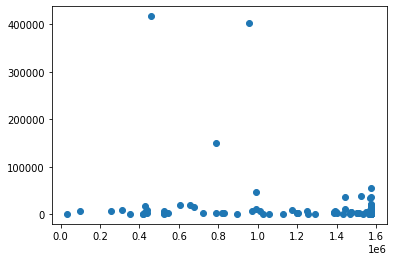

In [ ]:
mins = cluster_one['reservation_duration'].dt.components['days']*24*60 +\
 cluster_one['reservation_duration'].dt.components['minutes']

min_df = pd.DataFrame(mins, columns = ["reservation_duration"])
plt.scatter(mins, cluster_one['agg_lineitem_usageamount'])


### Observation after exploring the clusters

- pattern in cluster_one : all records that that had reserved the services for usage were in one clusters 
- and the ones without reservation were in a different cluster

Question:
1. is reservation only factor for making the decision about setting the alert 
2. what are the contributing facors
3. how to extract the most influential factors 

## Next steps 

- Extracting features from the dataset 
    - Nystrom method, kernel methods or PCA 
- implemented PCA for column selection
- we project all the features on the first PC and calculate the weight of a certain column 
- using the weighted features to implment a linear algorithm 

## Important features using PCA

In [ ]:
def get_important_features(transformed_features, components_, columns):

    num_columns = len(columns)

    xvector = components_[0] * max(transformed_features[:,0])
    yvector = components_[1] * max(transformed_features[:,1])

    important_features = { columns[i] : math.sqrt(xvector[i]**2 + yvector[i]**2) for i in range(num_columns) }
    important_features = sorted(zip(important_features.values(), important_features.keys()), reverse=True)
    print("Features by importance:\n")
    for feature in important_features:
        print(feature)


In [ ]:
pca_df = kmeans_df.drop(['lineitem_usageaccountid','day'], axis=1)
pca_df = pd.concat([pca_df, min_df], axis=1)
pca_df =  pca_df.fillna(0)
pca_df.head()

,agg_lineitem_unblendedcost,agg_lineitem_usageamount,agg_lineitem_blendedcost,agg_pricing_publicondemandcost,bill_billingentity,bill_payeraccountid,lineitem_lineitemdescription,lineitem_lineitemtype,lineitem_operation,pricing_term,...,reservation_modificationstatus,savingsplan_endtime,savingsplan_starttime,savingsplan_savingsplanarn,savingsplan_region,savingsplan_purchaseterm,savingsplan_purchaseoption,savingsplan_paymentoption,savingsplan_instancetypefamily,reservation_duration
0,0.000000,1.000000e+00,0.000000,0.000000,0,116462199383,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,0.000000,1.000000e+00,0.000000,0.000000,0,116462199383,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0.0
2,0.000006,2.000000e+00,0.000006,0.000006,0,116462199383,2,1,2,1,...,0,0,0,0,0,0,1,0,0,0.0
3,0.000000,2.042000e-07,0.000000,0.000000,0,116462199383,3,1,3,1,...,0,0,0,0,0,0,1,0,0,0.0
4,-0.150000,0.000000e+00,-0.150000,0.000000,0,116462199383,4,2,0,1,...,0,0,0,0,0,0,0,0,0,0.0


In [ ]:
from sklearn.decomposition import PCA
import math

pca = PCA(n_components=2, svd_solver='full')
pca.fit(pca_df)

pca_site = pca.transform(pca_df)

pca.explained_variance_ratio_
components = pd.DataFrame(pca.components_, columns = list(pca_df.columns))

pca.explained_variance_ratio_

get_important_features(pca_site, pca.components_, pca_df.columns.values)


Features by importance:

(1531450473.208765, 'agg_lineitem_usageamount')
(1573840.1603112991, 'reservation_duration')
(774.6504127390316, 'lineitem_lineitemdescription')
(740.7955534421546, 'agg_lineitem_unblendedcost')
(633.5582597275712, 'agg_lineitem_blendedcost')
(577.6468747366597, 'agg_pricing_publicondemandcost')
(572.265383522623, 'lineitem_usagetype')
(265.880490421644, 'reservation_reservationarn')
(92.9193343143795, 'lineitem_operation')
(64.0045909778684, 'reservation_starttime')
(62.89614062887868, 'reservation_endtime')
(10.223613294569684, 'product_region')
(9.760786087777571, 'pricing_unit')
(8.751246344314342, 'product_productfamily')
(6.829960212127155, 'product_tolocation')
(5.315580561267507, 'lineitem_lineitemtype')
(5.105107260618058, 'product_fromlocation')
(3.2697548101935063, 'savingsplan_purchaseoption')
(2.6715991087010997, 'product_productname')
(1.715117657206146, 'reservation_modificationstatus')
(1.4560018652553315, 'pricing_offeringclass')
(1.16674053924

## Conclusions 

- Using PCA we got the most important features, that will contribute in the binary classification 
- reservation duration is second most important feature in the dataset


## Future work 

- Making use of these features and the historic data we can predict a value (for example usageamount) and if the real value vastly out of the range we can set an alert system for such events 
- In this case I am assuming the **linear algorithms** will get the job done 
- We can tune the methods depending on the prediction accuracy 
- if the prediction are not valid we can make use of **ensemble methods** for better predictions 
- we could make use of week classifiers such as decision trees or make use of random forsests for better prediction 
- I think these will the good solution for the problem 
- But in case the system still needs improvements we could implement **deep learning models**
- deep learning models can leans the patterns from the data using activation functions 
- better prediction of events 

Anomaly detection:
- For detecting any anomaly of the frauds in the accounts we can make use of **autoencoders**, which are popularly used by financial institutions



## Shortcomings 

- with this system in place, we cannot include the **seasonal variability** in the usage 
- i.e, alert system may fail or vary according to the season 
- for example: during thanksgiving the _ecommerce_ website witness an increased traffic this will case the spike in the AWS service usage 
- in such case we can seasonality prediction such as **time series prediciton** using RNN 
- And for more accurate prediction we can make use of **encoders and decoders**